# 1 Reading the dataset

In [2]:
# import library and read datasets
import pandas as pd

df=pd.read_csv('IMDB Dataset.csv')

In [3]:
# take a sample of 10000 rows to make processing faster and get imbalance data

# 9000 positives
df_p=df[df['sentiment']=='positive'][:9000]

# 1000 negative
df_n=df[df['sentiment']=='negative'][:1000]



In [4]:
df_imb=pd.concat([df_p,df_n])

In [5]:
df_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

# 2 Dealing with Imbalanced Classes

<Axes: xlabel='sentiment'>

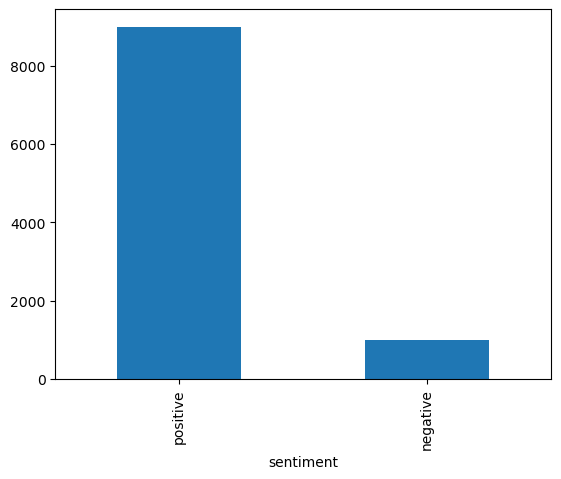

In [6]:
# make a barplot to show how data is distributed
df_imb.value_counts('sentiment').plot(kind='bar')

# 2.1 Balancing data with .sample()

In [7]:
len_neg=len(df_imb[df_imb['sentiment']=='negative'])

In [8]:
df_p=df_imb[df_imb['sentiment']=='positive'].sample(n=len_neg)
df_p

,review,sentiment
7699,A FROLICS OF YOUTH Short Subject.<br /><br />A...,positive
1078,"I thought Rachel York was fantastic as ""Lucy.""...",positive
8227,Even though it doesn't really matter to the fi...,positive
16610,"When I first read Hamlet, I couldn't help but ...",positive
7531,I'm disappointed at the lack of posts on this ...,positive
...,...,...
15909,"Even a decade after ""Frontline"" aired on the A...",positive
14284,"Honestly, this is the best reality show anyone...",positive
14313,"For those of you that don't that reference, cl...",positive
14005,There have been many movies about people retur...,positive


In [9]:
df_n=df_imb[df_imb['sentiment']=='negative']


In [10]:
df_bal=pd.concat([df_p,df_n])

In [11]:
df_bal.reset_index(drop=True,inplace=True)
df_bal

,review,sentiment
0,A FROLICS OF YOUTH Short Subject.<br /><br />A...,positive
1,"I thought Rachel York was fantastic as ""Lucy.""...",positive
2,Even though it doesn't really matter to the fi...,positive
3,"When I first read Hamlet, I couldn't help but ...",positive
4,I'm disappointed at the lack of posts on this ...,positive
...,...,...
1995,Stranded in Space (1972) MST3K version - a ver...,negative
1996,"I happened to catch this supposed ""horror"" fli...",negative
1997,waste of 1h45 this nasty little film is one to...,negative
1998,Warning: This could spoil your movie. Watch it...,negative


## 2.2 Balancing data with RandomUnderSampler

In [12]:
#!pip install imblearn

In [13]:
from imblearn.under_sampling import RandomUnderSampler

rus =RandomUnderSampler(random_state=0)


df_bal,df_bal['sentiment']=rus.fit_resample(df_imb[['review']],df_imb['sentiment'])

In [14]:
df_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

# 3 Splitting data into train and test

In [15]:
# import train_test_split
from sklearn.model_selection import train_test_split

train,test=train_test_split(df_bal, test_size=0.33,random_state=42)

In [16]:
test

,review,sentiment
11301,Refreshing `lost' gem! Featuring effective dia...,positive
681,Never saw the original movie in the series...I...,negative
7513,"Once upon a time, in Sweden, there was a poor ...",positive
1821,"At the beginning of the film, you might double...",negative
549,Another Spanish movie about the 1936 Civil War...,positive
...,...,...
207,"I have seen most, if not all of the Laurel & H...",negative
7616,D.W. Griffith could have made any film he want...,positive
13483,"Cardiff, Wales. A bunch of 5 mates are deeply ...",positive
1051,I rented this movie with my friend for a good ...,negative


In [17]:
# create train and test dataframes

train_x , train_y = train['review'], train['sentiment']

test_x , test_y = test['review'], test['sentiment']


In [18]:
train_x
train_y.value_counts()

sentiment
negative    675
positive    665
Name: count, dtype: int64

# 4 Text Representation (Bag of Words)

# 4.1 Count Vectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
text=["I love writing code in Python. I love Python code",
     "I hate writing code in Java. I hate Java code"]

df1=pd.DataFrame({'review':['review1','review2'],'text':text})
cv=CountVectorizer(stop_words='english')

cv_mtx=cv.fit_transform(df1['text'])

In [21]:
df_dtm = pd.DataFrame(
    cv_mtx.toarray(),
    index=df1['review'].values,
    columns=cv.get_feature_names_out()
)


In [22]:
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


## 4.2 Tfidf

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

text=["I love writing code in Python. I love Python code",
     "I hate writing code in Java. I hate Java code"]

df2=pd.DataFrame({'review':['review1','review2'],'text':text})
tfidf=TfidfVectorizer(stop_words='english',norm=None)
tfidf_matrix=tfidf.fit_transform(df2['text'])

In [24]:
pd.DataFrame(tfidf_matrix.toarray(),index=df1['review'].values,
    columns=tfidf.get_feature_names_out())

,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


# 5 Turning our text data into numerical vectors

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

# Fit TF-IDF on training data only
train_x_vector = tfidf.fit_transform(train_x)

# Transform test data using the SAME TF-IDF
test_x_vector = tfidf.transform(test_x)  # NOT fit_transform!

# Now create DataFrame safely
df_train_sparse = pd.DataFrame.sparse.from_spmatrix(
    train_x_vector,
    index=train_x.index,
    columns=tfidf.get_feature_names_out()  # same TF-IDF as train
)


In [30]:
df_train_sparse

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
742,0,0,0,0,0,0,0,0.042791,0,0,...,0,0,0,0,0,0,0,0,0,0
9464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 6 Model Selection

## 6.1 Support Vector Machines(SVM)

In [31]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')
svc.fit(train_x_vector,train_y)

SVC(kernel='linear')

In [32]:
svc.predict(tfidf.transform(['A good movie']))

array(['positive'], dtype=object)

In [34]:
svc.predict(tfidf.transform(['A excellent movie']))


array(['positive'], dtype=object)

In [35]:
svc.predict(tfidf.transform(['I did not like the movie']))

array(['negative'], dtype=object)

## 6.2 Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

dec_tree=DecisionTreeClassifier()
dec_tree.fit(train_x_vector,train_y)

DecisionTreeClassifier()

## 6.3 Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(train_x_vector.toarray(),train_y)

GaussianNB()

## 6.4 Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

log_red=LogisticRegression()
log_red.fit(train_x_vector,train_y)

LogisticRegression()

# 7 Model Evaluation

## 7.1 Confusion Matrix

In [46]:
# calculate confusion matrix of svc
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y,svc.predict(test_x_vector),
                labels=['positive','negative'])

array([[290,  45],
       [ 60, 265]])

## 7.2 Mean Accuracy

In [50]:
# calculate accuracy of all models
print(svc.score(test_x_vector,test_y))
print(dec_tree.score(test_x_vector,test_y))
print(gnb.score(test_x_vector.toarray(),test_y))
print(log_red.score(test_x_vector,test_y))

# model.score(test_x_vector,test_y)

0.8409090909090909
0.6530303030303031
0.6348484848484849
0.8303030303030303


# 7.3 F1 score

In [51]:
from sklearn.metrics import f1_score

f1_score(test_y,svc.predict(test_x_vector),
        labels=['positive','negative'],
        average=None)


array([0.84671533, 0.83464567])

# 7.4 Classification Report

In [53]:
from sklearn.metrics import classification_report

print(classification_report(test_y,svc.predict(test_x_vector),
        labels=['positive','negative'])
     )

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



# 8 Tuning the model

## 8.1 GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1,4,8,16,32],'kernel':['linear','rbf']}
svc=SVC()
svc_grid=GridSearchCV(svc,parameters,cv=5)
svc_grid.fit(train_x_vector,train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [55]:
svc_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [56]:
svc_grid.best_estimator_

SVC(C=1, kernel='linear')